In [1]:
# Ravi Patel

import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import normalize
import numpy as np
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(device)

mps


In [2]:
EPOCHS=5
BATCH_SIZE=32
LEARNING_RATE=.003
df = pd.read_csv('dataset/train.csv')

y = df['target'].values

del df['target']
del df['ID_code']
X = df.values

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X,y)

(array([134974.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  15026.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

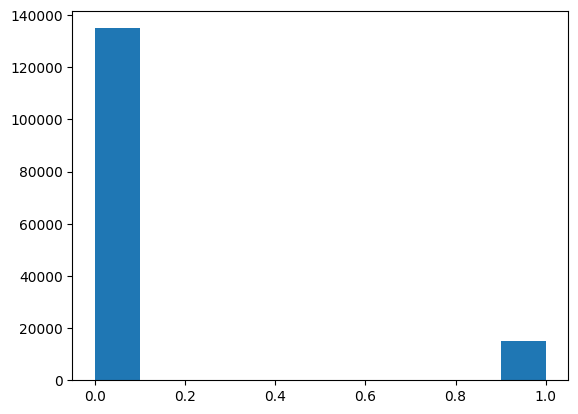

In [3]:
plt.hist(y_train)

In [4]:
print(f"y_train[:10]:{y_train[:10]}")
print(f"X_train[:10]:{X_train[:10]}")

print(f"y_test[:10]:{y_test[:10]}")
print(f"X_test[:10]:{X_test[:10]}")

y_train[:10]:[0 0 0 1 0 0 0 0 1 0]
X_train[:10]:[[ 0.04618266  0.01481902  0.05218988 ...  0.06454197  0.10205487
  -0.05255556]
 [ 0.07723054 -0.05259127  0.06922293 ...  0.05502028  0.08147032
  -0.03530345]
 [ 0.10042272 -0.01715254  0.06649283 ...  0.04826786  0.10207357
  -0.00656211]
 ...
 [ 0.0804875  -0.01210927  0.03651467 ...  0.05824305  0.10005728
  -0.02639998]
 [ 0.06169565 -0.01590059  0.04362649 ...  0.043143    0.09909871
  -0.01388431]
 [ 0.07416682  0.0392708   0.03904798 ...  0.04566126  0.07558411
  -0.02894257]]
y_test[:10]:[0 0 0 1 0 0 0 0 0 0]
X_test[:10]:[[ 0.07979224 -0.00826486  0.08920336 ...  0.06173154  0.12540578
   0.04399232]
 [ 0.073402    0.00440825  0.09177779 ...  0.05023669  0.09069084
  -0.16359845]
 [ 0.09771078 -0.00293644  0.05894467 ...  0.0629938   0.11819621
  -0.08829743]
 ...
 [ 0.06404875 -0.04326877  0.06567631 ...  0.05005141  0.07399665
  -0.12675894]
 [ 0.09579913  0.00782414  0.07540898 ...  0.04934815  0.09876879
  -0.14296599]
 [ 0

In [5]:
class TransactionsDataset(torch.utils.data.Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].astype(np.float32), self.y[idx].astype(np.float32)

dataset_train = TransactionsDataset(X_train,y_train)
dataset_test = TransactionsDataset(X_test,y_test)
dataloader_train = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE)
dataloader_test = torch.utils.data.DataLoader(dataset_test,batch_size=BATCH_SIZE)

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear_0 = torch.nn.Linear(200,1024)
        self.batch_norm_0 = torch.nn.BatchNorm1d(1024)
        self.relu_0 = torch.nn.ReLU(1024)
        self.linear_1 = torch.nn.Linear(1024,2048)
        self.batch_norm_1 = torch.nn.BatchNorm1d(2048)
        self.relu_1 = torch.nn.ReLU(2048)
        self.linear_2 = torch.nn.Linear(2048,1024)
        self.batch_norm_2 = torch.nn.BatchNorm1d(1024)
        self.relu_2 = torch.nn.ReLU(1024)
        self.dr_2 = torch.nn.Dropout1d(.2)
        self.linear_3 = torch.nn.Linear(1024,512)
        self.batch_norm_3 = torch.nn.BatchNorm1d(512)
        self.relu_3 = torch.nn.ReLU(512)
        self.linear_4 = torch.nn.Linear(512,256)
        self.batch_norm_4 = torch.nn.BatchNorm1d(256)
        self.relu_4 = torch.nn.ReLU(256)
        self.linear_5 = torch.nn.Linear(256,128)
        self.batch_norm_5 = torch.nn.BatchNorm1d(128)
        self.relu_5 = torch.nn.ReLU(128)
        self.dr_5 = torch.nn.Dropout1d(.2)
        self.linear_6 = torch.nn.Linear(128,64)
        self.batch_norm_6 = torch.nn.BatchNorm1d(64)
        self.relu_6 = torch.nn.ReLU(64)
        self.linear_7 = torch.nn.Linear(64,16)
        self.relu_7 = torch.nn.ReLU(16)
        self.batch_norm_7 = torch.nn.BatchNorm1d(16)
        self.linear_8 = torch.nn.Linear(16,1)
        self.relu_8 = torch.nn.ReLU(1)
    
    def forward(self,x):
        x = self.linear_0(x)
        x = self.batch_norm_0(x)
        x = self.relu_0(x)
        x = self.linear_1(x)
        x = self.batch_norm_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.batch_norm_2(x)
        x = self.relu_2(x)
        x = self.dr_2(x)
        x = self.linear_3(x)
        x = self.batch_norm_3(x)
        x = self.relu_3(x)
        x = self.linear_4(x)
        x = self.batch_norm_4(x)
        x = self.relu_5(x)
        x = self.dr_5(x)
        x = self.linear_5(x)
        x = self.batch_norm_5(x)
        x = self.relu_6(x)
        x = self.linear_6(x)
        x = self.batch_norm_6(x)
        x = self.relu_7(x)
        x = self.linear_7(x)
        x = self.batch_norm_7(x)
        x = self.relu_8(x)
        x = self.linear_8(x)
        return x
    

model = Model()
model.to(device)
checkpoint = None
# we need to add some weight to the success values because the labels are very unbalanced
loss = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([17.0/18.0]))
loss.to(device)
min_loss = None
optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer, min_loss, checkpoint):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    if not min_loss:
        min_loss = loss
        checkpoint = model
    if loss.item() < min_loss.item():
        min_loss = loss
        checkpoint = model
    print(f"Checkpoint training loss:{min_loss:>7f}")
    return model, optimizer, min_loss, checkpoint

def test_loop(dataloader, model, loss_fn, threshold_fn = torch.round):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    preds = []
    targets = []
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            y = y.unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred = torch.sigmoid(pred)
            pred = threshold_fn(pred)
            correct += (pred == y).sum().item()
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    print(classification_report(targets,preds))
            

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
for i in range(EPOCHS):
    model, optimizer, min_loss, checkpoint = train_loop(dataloader_train, model, loss, optimizer, min_loss, checkpoint)
    test_loop(dataloader_test, model, loss)

Train loss: 0.599502  [   32/150000]
Train loss: 0.185506  [32032/150000]
Train loss: 0.174006  [64032/150000]
Train loss: 0.566167  [96032/150000]
Train loss: 0.192342  [128032/150000]
Checkpoint training loss:0.404640
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     44928
         1.0       0.85      0.07      0.13      5072

    accuracy                           0.90     50000
   macro avg       0.88      0.53      0.54     50000
weighted avg       0.90      0.90      0.87     50000

Test Error: 
 Accuracy: 90.4%, Avg loss: 0.242471 

Train loss: 0.273231  [   32/150000]
Train loss: 0.192182  [32032/150000]
Train loss: 0.173062  [64032/150000]
Train loss: 0.503392  [96032/150000]
Train loss: 0.227225  [128032/150000]
Checkpoint training loss:0.404640
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     44928
         1.0       0.81      0.10      0.18      5072

    accuracy     

In [9]:
print(f"Final checkpoint model loss: {min_loss.item()}")

Final checkpoint model loss: 0.3125920593738556


In [10]:
# Recall is less than ideal, but this dataset is fairly imbalanced toward 0 for the label.

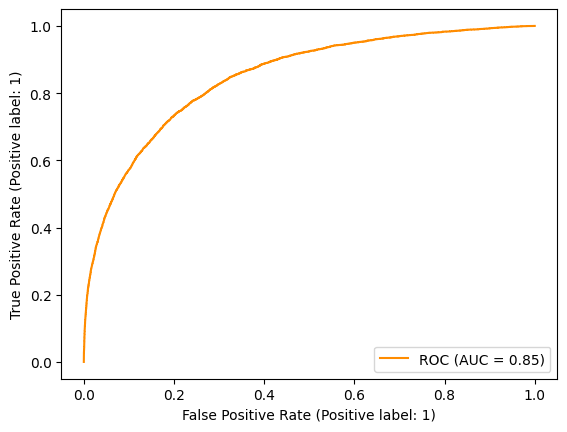

In [11]:
def get_roc_auc(dataloader_test, model):
    model.eval()
    preds = []
    targets = []
    with torch.no_grad():
        for X, y in dataloader_test:
            X = X.to(device)
            pred = model(X)
            pred = torch.sigmoid(pred)
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    RocCurveDisplay.from_predictions(
        targets,
        preds,
        name=f"ROC",
        color="darkorange",
    )
    auc = roc_auc_score(targets, preds)
    fps, tps, thresholds = roc_curve(targets, preds)
    return (auc, fps, tps, thresholds)


auc, fps, tps, thresholds = get_roc_auc(dataloader_test, model)

In [12]:
gmeans = np.sqrt(tps * (1-fps))
i = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[i], gmeans[i]))

Best Threshold=0.076404, G-Mean=0.768


In [13]:
test_loop(dataloader_test,model,loss,lambda x: (x > thresholds[i]).type(torch.int8))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85     44928
         1.0       0.27      0.78      0.40      5072

    accuracy                           0.76     50000
   macro avg       0.62      0.77      0.62     50000
weighted avg       0.90      0.76      0.80     50000

Test Error: 
 Accuracy: 76.1%, Avg loss: 0.238643 



In [14]:
# Adjusting the threshold from round to manual, our recall has significantly increased but have lost precision.
# The real question here is what is actually important in terms of risk. 